# Import and format data


In [67]:
import pandas as pd
# names = ['Time','ID','Data']
read_file = pd.read_csv("C:/Users/ellsan/Desktop/test_stuff/candump-2021-02-08_150302.log", header = None)
read_file.to_csv (r'\Users\ellsan\Desktop\test_stuff\can_data.csv', index=None)
can_data = pd.read_csv("C:/Users/ellsan/Desktop/test_stuff/can_data.csv")

In [68]:
can_data

,0
0,(1612792982.877603) vcan0 039#0039
1,(1612792982.878789) vcan0 095#800007F400000017
2,(1612792982.879953) vcan0 1A4#0000000800000010
3,(1612792982.880018) vcan0 1AA#7FFF000000006711
4,(1612792982.880060) vcan0 1B0#000F0000000157
...,...
845497,(1612793413.487522) vcan0 244#00000001C0
845498,(1612793413.489308) vcan0 166#D0320018
845499,(1612793413.490420) vcan0 158#0000000000000019
845500,(1612793413.490455) vcan0 161#000005500108001C


### remove vcan0

In [69]:
text = open("can_data.csv", "r")
text = ''.join([i for i in text]) \
    .replace("vcan0", ",")
x = open("can_data.csv","w")
x.writelines(text)
x.close()

### remove hash

In [70]:
text = open("can_data.csv", "r")
text = ''.join([i for i in text]) \
    .replace("#", ",")
x = open("can_data.csv","w")
x.writelines(text)
x.close()

### remove parenthesis

In [71]:
text = open("can_data.csv", "r")
text = ''.join([i for i in text]) \
    .replace("(", "")
x = open("can_data.csv","w")
x.writelines(text)
x.close()

text = open("can_data.csv", "r")
text = ''.join([i for i in text]) \
    .replace(")", "")
x = open("can_data.csv","w")
x.writelines(text)
x.close()

In [83]:
can_data = pd.read_csv("C:/Users/ellsan/Desktop/test_stuff/can_data.csv",names = ['Time','ID','Data'])
print(can_data)



                Time    ID              Data
0       0.000000e+00   NaN               NaN
1       1.612793e+09   039              0039
2       1.612793e+09   095  800007F400000017
3       1.612793e+09   1A4  0000000800000010
4       1.612793e+09   1AA  7FFF000000006711
...              ...   ...               ...
845498  1.612793e+09   244        00000001C0
845499  1.612793e+09   166          D0320018
845500  1.612793e+09   158  0000000000000019
845501  1.612793e+09   161  000005500108001C
845502  1.600000e+01   NaN               NaN

[845503 rows x 3 columns]


In [180]:
Time = can_data['Time']
Time = Time[1:-1]
Time = Time.reset_index(drop=True)

ID = can_data['ID']
ID = ID[1:-1]
ID = ID.reset_index(drop=True)

Data = can_data['Data']
Data = Data[1:-1]
Data = Data.reset_index(drop=True)




In [182]:
import numpy as np

def delta_time(Time):
    delta = np.zeros((Time.size))
    for x in range(Time.size-1):
        #delta_x = Time[x+1]-Time[x]
       # delta.append(delta_x) 
       delta[x] = Time[x+1]-Time[x]

    return delta   

delta = delta_time(Time)


In [186]:
 def convert_from_hex(hex):
     dec = np.zeros((hex.size))

     for x in range(hex.size):
         h_value = hex[x]
         dec[x] = int(h_value,16)
     return dec


data = convert_from_hex(Data)
id = convert_from_hex(ID)

## Normalize data

In [192]:
from sklearn.preprocessing import MinMaxScaler


In [197]:
scaler = MinMaxScaler(feature_range=(0, 1))
data = data.reshape(-1, 1)
data = scaler.fit_transform(data)
id = id.reshape(-1, 1)
id = scaler.fit_transform(id)

In [204]:
from matplotlib import pyplot


Text(0, 0.5, 'ID')

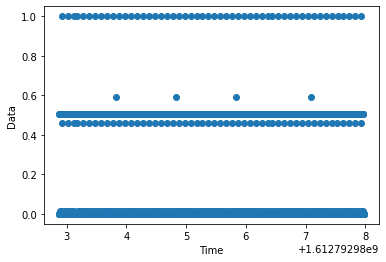

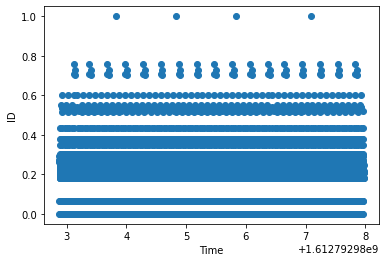

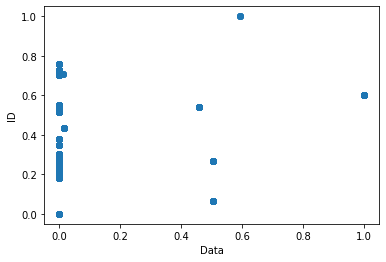

In [217]:
import matplotlib.pyplot as plt

pyplot.figure()
pyplot.plot(Time[0:10000],data[0:10000],'o')
plt.xlabel('Time')
plt.ylabel('Data')

pyplot.figure()
pyplot.plot(Time[0:10000],id[0:10000],'o')
plt.xlabel('Time')
plt.ylabel('ID')

plt.figure()
plt.plot(data[0:10000],id[0:10000],'o')
plt.xlabel('Data')
plt.ylabel('ID')




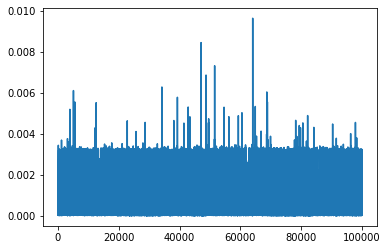

In [226]:
steps = range(Time.size)
plt.figure()
plt.plot(steps[0:100000],delta[0:100000])

## copied

In [220]:
# split a univariate sequence into samples
from numpy import array


def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [269]:
n_steps = 5
X, y = split_sequence(id[0:10000], n_steps)

In [246]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [270]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [248]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [274]:
# fit model

model.fit(X, y, epochs=20, verbose=0)

In [275]:

# demonstrate prediction
x_input = X[50:55,1,:]
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[0.19732118]]


In [276]:
print( X[56,1,:]-yhat)
print( X[56,1,:])

[[0.04906611]]
[0.24638728]


In [277]:
train_X = X
train_y = y
test_X = X[50:55,1,:]
test_y = X[56,1,:]
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Epoch 1/50


ValueError: Data cardinality is ambiguous:
  x sizes: 5
  y sizes: 1
Please provide data which shares the same first dimension.

## ^copied